In [12]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Users Dataset

contains information about users such as
- sex
- age
- occupation
- zipcode

In [13]:
users = pd.read_csv("users.dat", sep="::", header=None)

print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
0    6040 non-null int64
1    6040 non-null object
2    6040 non-null int64
3    6040 non-null int64
4    6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB
None


/home/nicola/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [14]:
usersHeader = ["userID", "gender", "age", "occupation", "zipCode"]
users.columns = usersHeader
users.head(10)
print(users.shape)

(6040, 5)


since some users have two zipcodes we decided to take only the first ones, more on this
later

In [15]:
modified = []

def clean_zipCode(value):
    t = value.split("-")
    if(len(t) > 1):
        global modified
        modified.append(t)
    return int(t[0])


users["zipCode"] = users["zipCode"].apply(clean_zipCode)

print(users.info())

print("modified {} elements".format(len(modified)))
# print(modified)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
userID        6040 non-null int64
gender        6040 non-null object
age           6040 non-null int64
occupation    6040 non-null int64
zipCode       6040 non-null int64
dtypes: int64(4), object(1)
memory usage: 236.0+ KB
None
modified 66 elements


The age of users is formed by catagories
- under 18
- 18-24
- 25-34
- 35-44
- 45-49
- 50-55
- over 56

to extract some information like means and so on, we convert the category to
the mean value

In [16]:
mod_age = 0

def clean_age(age):
    if age==1:
        return 6+(18-6)/2
    elif age==18:
        return age+(24-18)/2
    elif age==25:
        return age+(34-25)/2
    elif age==35:
        return age+(44-35)/2
    elif age==45:
        return age+(49-45)/2
    elif age==50:
        return age+(55-50)/2
    elif age==56:
        return age+(80-56)/2
    else:
        global mod_age
        mod_age = mod_age+1
        return np.nan

users["age"] = users["age"].apply(clean_age)
print("mod_age Nan: {}".format(mod_age))


mod_age Nan: 0


occupations are stored as integers, this dictionary is made to convert them in names

In [17]:
occu = {
    0:"other",
    1:"academic/educator",
    2:"artist",
    3:"clerical/admin",
    4:"college/grad student",
    5:"customer service",
    6:"doctor/health care",
    7:"executive/managerial",
    8:"farmer",
    9:"homemaker",
    10:"K-12 student",
    11:"lawyer",
    12:"programmer",
    13:"retired",
    14:"sales/marketing",
    15:"scientist",
    16:"self-employed",
    17:"technician/engineer",
    18:"tradesman/craftsman",
    19:"unemployed",
    20:"writer"}


# maybe not the case, too much space, only for plots
# users["occupation"].replace(occu, inplace=True)

# Zip Code Dataset

since the zipcode itself is useless we seek for a database of zipcodes and use it
to locate geographically the users.

In [18]:
zipp = pd.read_csv("zip.csv")
print(zipp.info())

print(zipp.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81831 entries, 0 to 81830
Data columns (total 20 columns):
RecordNumber           81831 non-null int64
Zipcode                81831 non-null int64
ZipCodeType            81831 non-null object
City                   81831 non-null object
State                  81831 non-null object
LocationType           81831 non-null object
Lat                    81178 non-null float64
Long                   81178 non-null float64
Xaxis                  81831 non-null float64
Yaxis                  81831 non-null float64
Zaxis                  81831 non-null float64
WorldRegion            334 non-null object
Country                81831 non-null object
LocationText           81180 non-null object
Location               81830 non-null object
Decommisioned          81831 non-null bool
TaxReturnsFiled        58447 non-null float64
EstimatedPopulation    58447 non-null float64
TotalWages             58354 non-null float64
Notes                  1844 non-nu

/home/nicola/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


we take only the relevant informations

In [19]:
zipp = zipp[["Zipcode", "City", "State", "Lat", "Long", "Country"]]
zipp.columns = ["zipCode", "city", "state", "lat", "long", "country"]

In [20]:
print(zipp.isnull().sum())
print(zipp.head(2))

zipCode      0
city         0
state        0
lat        653
long       653
country      0
dtype: int64
   zipCode                 city state    lat   long country
0      704          PARC PARQUE    PR  17.96 -66.22      US
1      704  PASEO COSTA DEL SUR    PR  17.96 -66.22      US


In [21]:
print(zipp["zipCode"].value_counts().head(5))

zipp[ zipp['zipCode'] == 926 ].head(10)

926    130
725     82
662     75
969     73
612     68
Name: zipCode, dtype: int64


,zipCode,city,state,lat,long,country
2257,926,SAN JUAN,PR,18.4,-66.06,US
2258,926,CUPEY,PR,18.4,-66.06,US
2259,926,RIO PIEDRAS,PR,18.4,-66.06,US
2260,926,ALTS DE BORINQUEN GDNS,PR,18.4,-66.06,US
2261,926,ALTS DEL REMANSO,PR,18.4,-66.06,US
2262,926,BDA VISTA ALEGRE,PR,18.4,-66.06,US
2263,926,BO BUEN CONSEJO,PR,18.4,-66.06,US
2264,926,BO CANEJAS,PR,18.4,-66.06,US
2265,926,BO CARRAIZO,PR,18.4,-66.06,US
2266,926,BO DULCE,PR,18.4,-66.06,US


since more than one location can be associated to the same zipcode, in the following
we get rid of some of them, keeping only the first city for a certain zipcode

In [22]:
zipp = zipp.drop_duplicates(subset="zipCode", keep="first")

print(zipp["zipCode"].value_counts().head(10))
print(zipp.isnull().sum())

2047     1
30180    1
24033    1
87520    1
44511    1
42462    1
48605    1
77054    1
96679    1
99802    1
Name: zipCode, dtype: int64
zipCode      0
city         0
state        0
lat        648
long       648
country      0
dtype: int64


Now we join the two dataset to obtain geographical information about the users, in this
operation 68 users are lost, this is a small percentage, so we decided to keep this 
restricted dataset for the future. In the next the dataset is checked for consistency and is
saved in a csv file.

In [23]:
full = pd.merge(users, zipp, how="inner", on="zipCode")

print(full.head(2))

print("\nlost {} values in the join".format( users.shape[0]-full.shape[0] ))

   userID gender   age  occupation  zipCode       city state   lat   long  \
0       1      F  12.0          10    48067  ROYAL OAK    MI  42.5 -83.15   
1     583      F  29.5           0    48067  ROYAL OAK    MI  42.5 -83.15   

  country  
0      US  
1      US  

lost 68 values in the join


In [24]:
full.head(10)
print(full.shape)
print(full.isnull().sum())

(5972, 10)
userID        0
gender        0
age           0
occupation    0
zipCode       0
city          0
state         0
lat           7
long          7
country       0
dtype: int64


In [25]:
full = full.sort_values("userID", ascending=True)

In [26]:
full.head(10)

filename="usersfull.csv"

full.to_csv(path_or_buf=filename, sep=",", header=True, index=False)

# Now load data from csv file

The largest part of the users are from US

In [27]:
full = pd.read_csv("usersfull.csv")
print(full["country"].value_counts(dropna=False))

US    5967
DE       3
MH       1
TR       1
Name: country, dtype: int64


In [28]:
print(full["state"].value_counts().sort_values(ascending=False).head(6))

CA    1100
NY     464
MN     432
TX     311
MA     298
IL     287
Name: state, dtype: int64


In [29]:
ca_mask = full["state"].astype("str") == "CA"
len(ca_mask)

ca = full[ca_mask]

ca.head(10)

,userID,gender,age,occupation,zipCode,city,state,lat,long,country
9,10,F,39.5,1,95370,SONORA,CA,37.98,-120.39,US
12,13,M,47.0,1,93304,BAKERSFIELD,CA,35.33,-119.02,US
16,17,M,52.5,1,95350,MODESTO,CA,37.67,-121.01,US
17,18,F,21.0,3,95825,SACRAMENTO,CA,38.58,-121.40,US
22,23,M,39.5,0,90049,LOS ANGELES,CA,34.08,-118.49,US
35,36,M,29.5,3,94123,SAN FRANCISCO,CA,37.80,-122.43,US
44,45,F,47.0,16,94110,SAN FRANCISCO,CA,37.74,-122.41,US
46,47,M,21.0,4,94305,STANFORD,CA,37.41,-122.17,US
47,48,M,29.5,4,92107,SAN DIEGO,CA,32.73,-117.24,US
60,61,M,29.5,17,95122,SAN JOSE,CA,37.33,-121.83,US


In [30]:
rows = np.random.choice(ca.index.values, 10)
print(ca.loc[rows])

      userID gender   age  occupation  zipCode                    city state  \
5406    5468      M  29.5          12    94618                 OAKLAND    CA   
4135    4185      M  29.5          14    90274  PALOS VERDES PENINSULA    CA   
3591    3637      M  29.5           6    94127           SAN FRANCISCO    CA   
3313    3353      M  39.5          17    92688  RANCHO SANTA MARGARITA    CA   
1635    1653      M  21.0           0    94044                PACIFICA    CA   
1947    1969      F  29.5           3    92116               SAN DIEGO    CA   
5492    5556      M  47.0           6    92103               SAN DIEGO    CA   
1308    1322      M  68.0           0    94043           MOUNTAIN VIEW    CA   
4601    4653      M  39.5          12    95051             SANTA CLARA    CA   
2328    2354      M  39.5          11    94306               PALO ALTO    CA   

        lat    long country  
5406  37.84 -122.23      US  
4135  33.77 -118.34      US  
3591  37.73 -122.45      US  

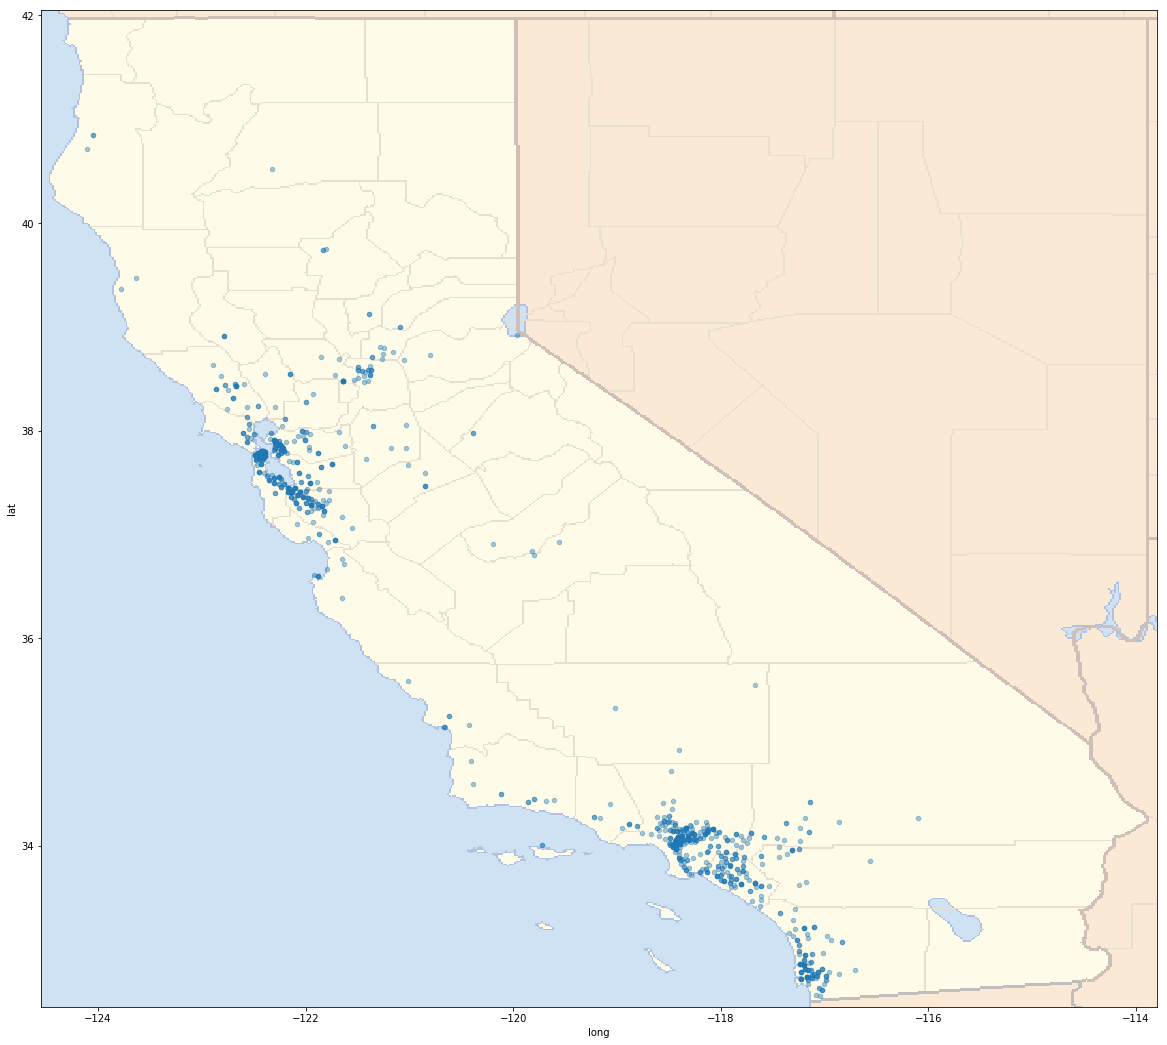

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

california_img = mpimg.imread('california.png')

plt.figure(figsize=(20,20))

ax = ca.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(20,20))

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.show()

In [32]:
occu = {
    0:"other",
    1:"academic/educator",
    2:"artist",
    3:"clerical/admin",
    4:"college/grad student",
    5:"customer service",
    6:"doctor/health care",
    7:"executive/managerial",
    8:"farmer",
    9:"homemaker",
    10:"K-12 student",
    11:"lawyer",
    12:"programmer",
    13:"retired",
    14:"sales/marketing",
    15:"scientist",
    16:"self-employed",
    17:"technician/engineer",
    18:"tradesman/craftsman",
    19:"unemployed",
    20:"writer"}


# maybe not the case, too much space, only for plots
users["occupation"].replace(occu, inplace=True)

In [33]:
users.head(3)

,userID,gender,age,occupation,zipCode
0,1,F,12.0,K-12 student,48067
1,2,M,68.0,self-employed,70072
2,3,M,29.5,scientist,55117


Male-Female counts, but since probably the gender is the one of the account owner these
statistics are wrong

M    4331
F    1709
Name: gender, dtype: int64


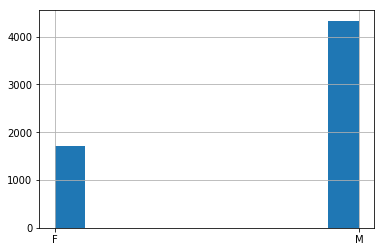

In [34]:
print(users["gender"].value_counts(dropna=False))
users["gender"].hist()
plt.savefig("mf_hist")

29.5    2096
39.5    1193
21.0    1103
47.0     550
52.5     496
68.0     380
12.0     222
Name: age, dtype: int64


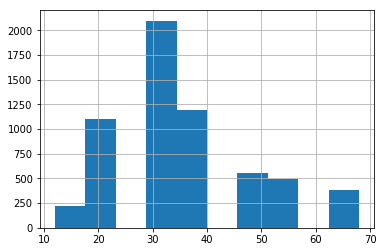

In [35]:
print(users["age"].value_counts(dropna=False))
users["age"].hist()

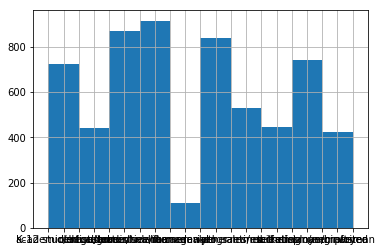

In [36]:
users["occupation"].hist()

<class 'pandas.core.series.Series'>
occupation
K-12 student            195
academic/educator       528
artist                  267
clerical/admin          173
college/grad student    759
customer service        112
doctor/health care      236
executive/managerial    679
farmer                   17
homemaker                92
lawyer                  129
other                   711
programmer              388
retired                 142
sales/marketing         302
scientist               144
self-employed           241
technician/engineer     502
tradesman/craftsman      70
unemployed               72
writer                  281
dtype: int64


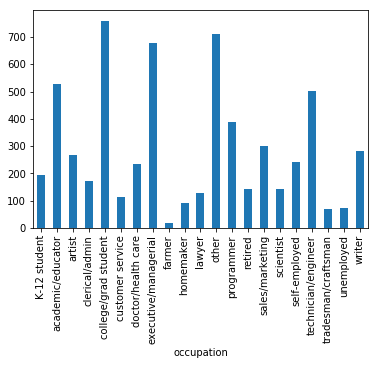

In [37]:
a = users.groupby("occupation").size()
print(type(a))
print(a)
a.plot(kind='bar')

In [38]:
table = pd.pivot_table(users, index=['gender', 'occupation'], values=['age'], aggfunc=np.mean)
table

age
gender occupation                     
F      K-12 student          12.409091
       academic/educator     39.662679
       artist                38.060440
       clerical/admin        38.080000
       college/grad student  24.378205
       customer service      34.693548
       doctor/health care    41.794118
       executive/managerial  37.622302
       farmer                53.333333
       homemaker             38.544944
       lawyer                36.818182
       other                 35.329741
       programmer            38.520000
       retired               64.485294
       sales/marketing       33.550633
       scientist             37.392857
       self-employed         43.823529
       technician/engineer   34.605769
       tradesman/craftsman   41.000000
       unemployed            25.766667
       writer                36.403846
M      K-12 student          14.596899
       academic/educator     41.195925
       artist                33.281250
       clerical/admin        36.849315
       college/grad student  23.622857
       customer service      33.049383
       doctor/health care    40.921642
       executive/managerial  39.625926
       farmer                37.464286
       homemaker             30.000000
       lawyer                38.551402
       other                 33.899791
       programmer            33.125740
       retired               62.032407
       sales/marketing       36.226457
       scientist             35.198276
       self-employed         41.713158
       technician/engineer   36.671111
       tradesman/craftsman   37.212121
       unemployed            26.675439
       writer                34.733990

In [39]:
print(type(table))
print(table.loc["M"])
print(type(table.loc["M"]))

<class 'pandas.core.frame.DataFrame'>
                            age
occupation                     
K-12 student          14.596899
academic/educator     41.195925
artist                33.281250
clerical/admin        36.849315
college/grad student  23.622857
customer service      33.049383
doctor/health care    40.921642
executive/managerial  39.625926
farmer                37.464286
homemaker             30.000000
lawyer                38.551402
other                 33.899791
programmer            33.125740
retired               62.032407
sales/marketing       36.226457
scientist             35.198276
self-employed         41.713158
technician/engineer   36.671111
tradesman/craftsman   37.212121
unemployed            26.675439
writer                34.733990
<class 'pandas.core.frame.DataFrame'>


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4cfcb450b8>],
      dtype=object)

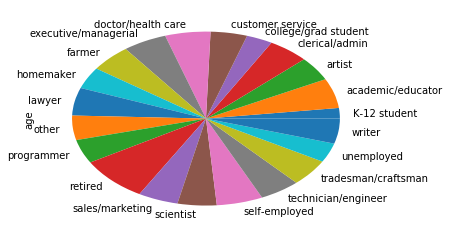

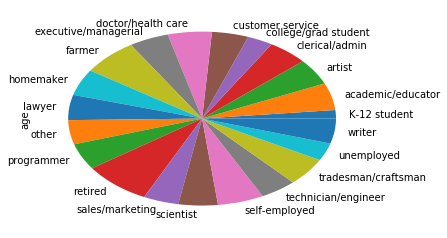

In [40]:
# help(pd.Series.plot)
table.loc["M"].plot(kind='pie',subplots=True, legend=False, use_index=False, label=None)# , subplots=True)# .legend(loc='best')
table.loc["F"].plot(kind='pie',subplots=True, legend=False)# , subplots=True)# .legend(loc='best')

In [41]:
u_go = users.groupby(["gender", "occupation"]).size()
print(u_go)

gender  occupation          
F       K-12 student             66
        academic/educator       209
        artist                   91
        clerical/admin          100
        college/grad student    234
        customer service         31
        doctor/health care      102
        executive/managerial    139
        farmer                    3
        homemaker                89
        lawyer                   22
        other                   232
        programmer               50
        retired                  34
        sales/marketing          79
        scientist                28
        self-employed            51
        technician/engineer      52
        tradesman/craftsman       4
        unemployed               15
        writer                   78
M       K-12 student            129
        academic/educator       319
        artist                  176
        clerical/admin           73
        college/grad student    525
        customer service         81

<class 'pandas.core.series.Series'>


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d0116bda0>],
      dtype=object)

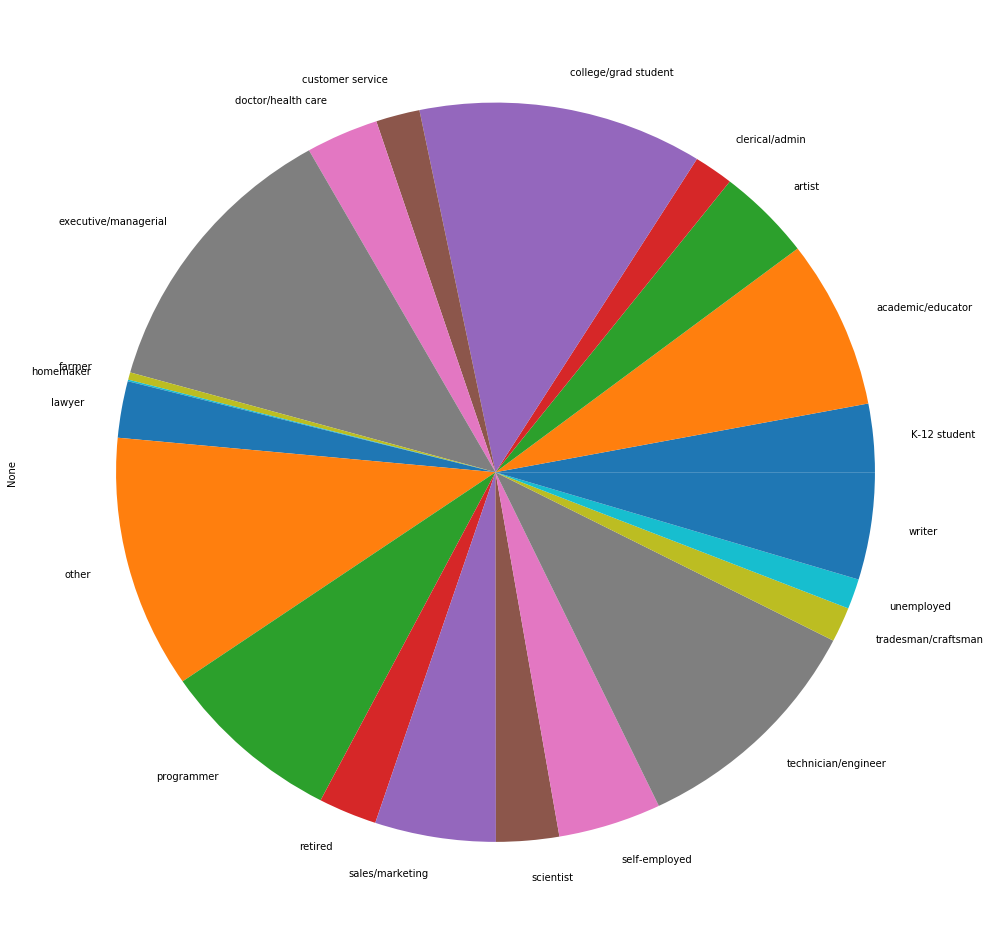

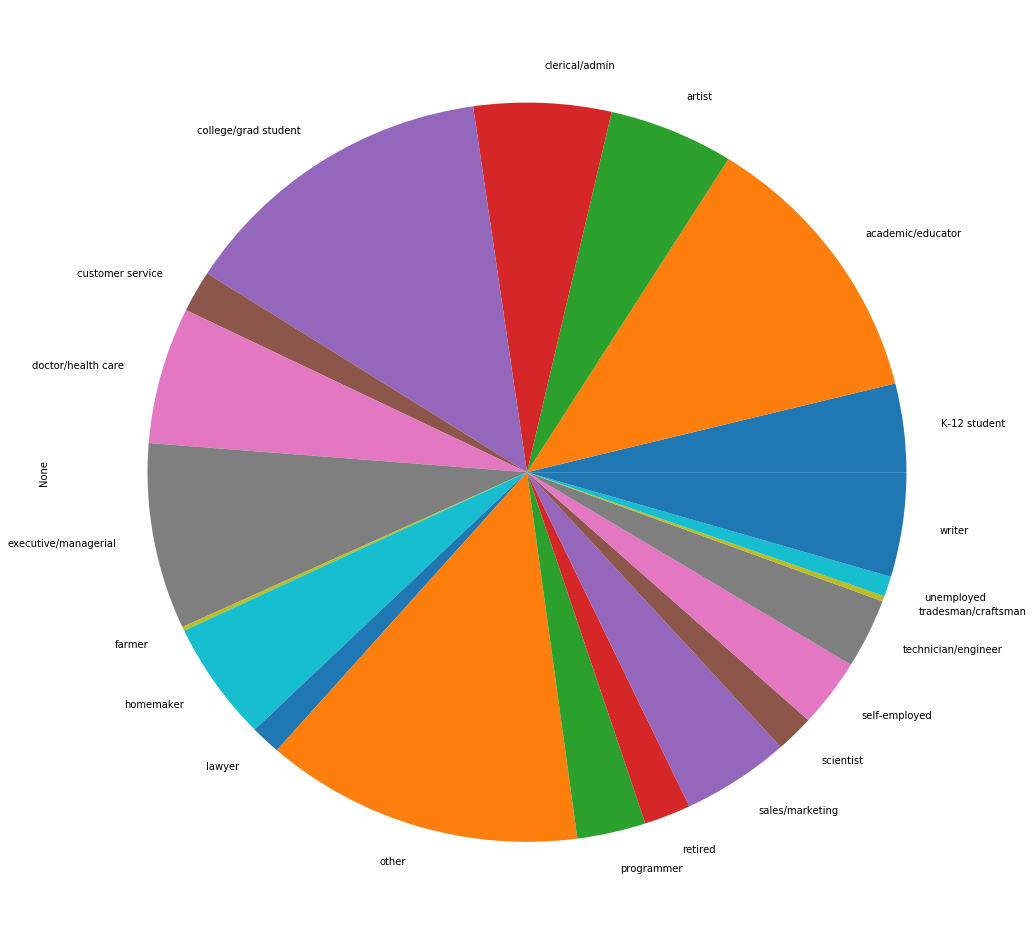

In [42]:
print(type(u_go.loc["M"]))
plt.figure(figsize=(17,17))
u_go.loc["M"].plot(kind='pie', subplots=True)
plt.figure(figsize=(17,17))
u_go.loc["F"].plot(kind='pie', subplots=True)

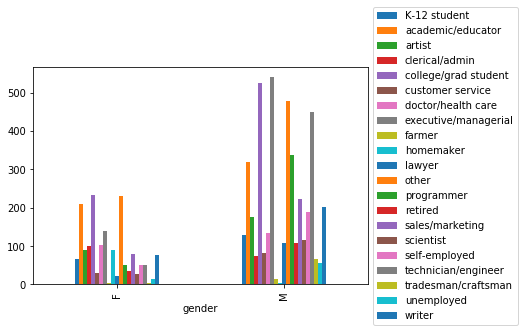

In [43]:
u_go.unstack().plot(kind='bar',).legend(loc='best', bbox_to_anchor=(1, 1.3))
plt.show()

In [44]:
table = pd.pivot_table(users, index='occupation', values="gender", aggfunc='count')
print(table)
table["gender"].sum()

                      gender
occupation                  
K-12 student             195
academic/educator        528
artist                   267
clerical/admin           173
college/grad student     759
customer service         112
doctor/health care       236
executive/managerial     679
farmer                    17
homemaker                 92
lawyer                   129
other                    711
programmer               388
retired                  142
sales/marketing          302
scientist                144
self-employed            241
technician/engineer      502
tradesman/craftsman       70
unemployed                72
writer                   281


6040

Study the occupation by gender

In [56]:
mf = u_go = users.groupby(["occupation", "gender"]).size()
# print(mf)
# print(type(mf))
# print(mf.columns)
#print(mf['occupation'])
# table1 = pd.pivot_table(mf, index='occupation', columns='gender')
table = pd.pivot_table(users, index='occupation', columns='gender', aggfunc='count', values='age', margins=True)
print(table)
table = pd.pivot_table(users, index='occupation', columns='gender', aggfunc='count', values='age')
print(table)
flattened = pd.DataFrame(table.to_records())
print(flattened)
# print(mf)
# table = pd.pivot_table(mf, index='occupation', columns='gender')
# print(table)
# table1 = pd.pivot_table(mf, index='occupation')
# print(table1)

gender                     F       M     All
occupation                                  
K-12 student            66.0   129.0   195.0
academic/educator      209.0   319.0   528.0
artist                  91.0   176.0   267.0
clerical/admin         100.0    73.0   173.0
college/grad student   234.0   525.0   759.0
customer service        31.0    81.0   112.0
doctor/health care     102.0   134.0   236.0
executive/managerial   139.0   540.0   679.0
farmer                   3.0    14.0    17.0
homemaker               89.0     3.0    92.0
lawyer                  22.0   107.0   129.0
other                  232.0   479.0   711.0
programmer              50.0   338.0   388.0
retired                 34.0   108.0   142.0
sales/marketing         79.0   223.0   302.0
scientist               28.0   116.0   144.0
self-employed           51.0   190.0   241.0
technician/engineer     52.0   450.0   502.0
tradesman/craftsman      4.0    66.0    70.0
unemployed              15.0    57.0    72.0
writer    

In [57]:
flattened.set_index('occupation', inplace=True)
print(flattened)

                        F    M
occupation                    
K-12 student           66  129
academic/educator     209  319
artist                 91  176
clerical/admin        100   73
college/grad student  234  525
customer service       31   81
doctor/health care    102  134
executive/managerial  139  540
farmer                  3   14
homemaker              89    3
lawyer                 22  107
other                 232  479
programmer             50  338
retired                34  108
sales/marketing        79  223
scientist              28  116
self-employed          51  190
technician/engineer    52  450
tradesman/craftsman     4   66
unemployed             15   57
writer                 78  203


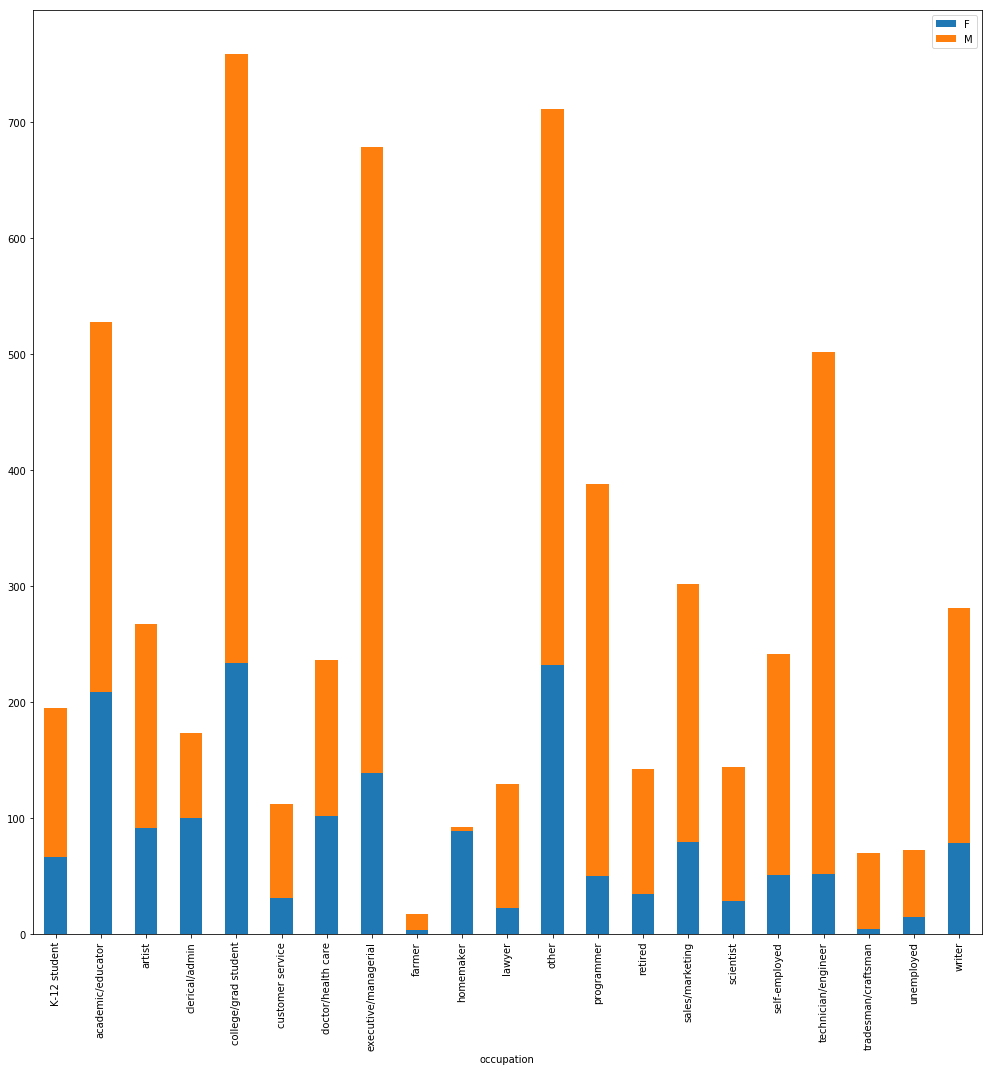

In [58]:
plt.figure(figsize=(17,17))
flattened.plot.bar(stacked=True, figsize=(17,17))

plt.savefig("occup_hist_mf")

# Use the Figure.savefig() method, like so:

# ax = s.hist()  # s is an instance of Series
# fig = ax.get_figure()
# fig.savefig('/path/to/figure.pdf')

# It doesn't have to end in pdf, there are many options. Check out the documentation.

# Alternatively, you can use the pyplot interface and just call the savefig as a function to save the most recently created figure:

# import matplotlib.pyplot as plt
# s.hist()
# plt.savefig('path/to/figure.pdf')  # saves the current figure



[1. 1.]


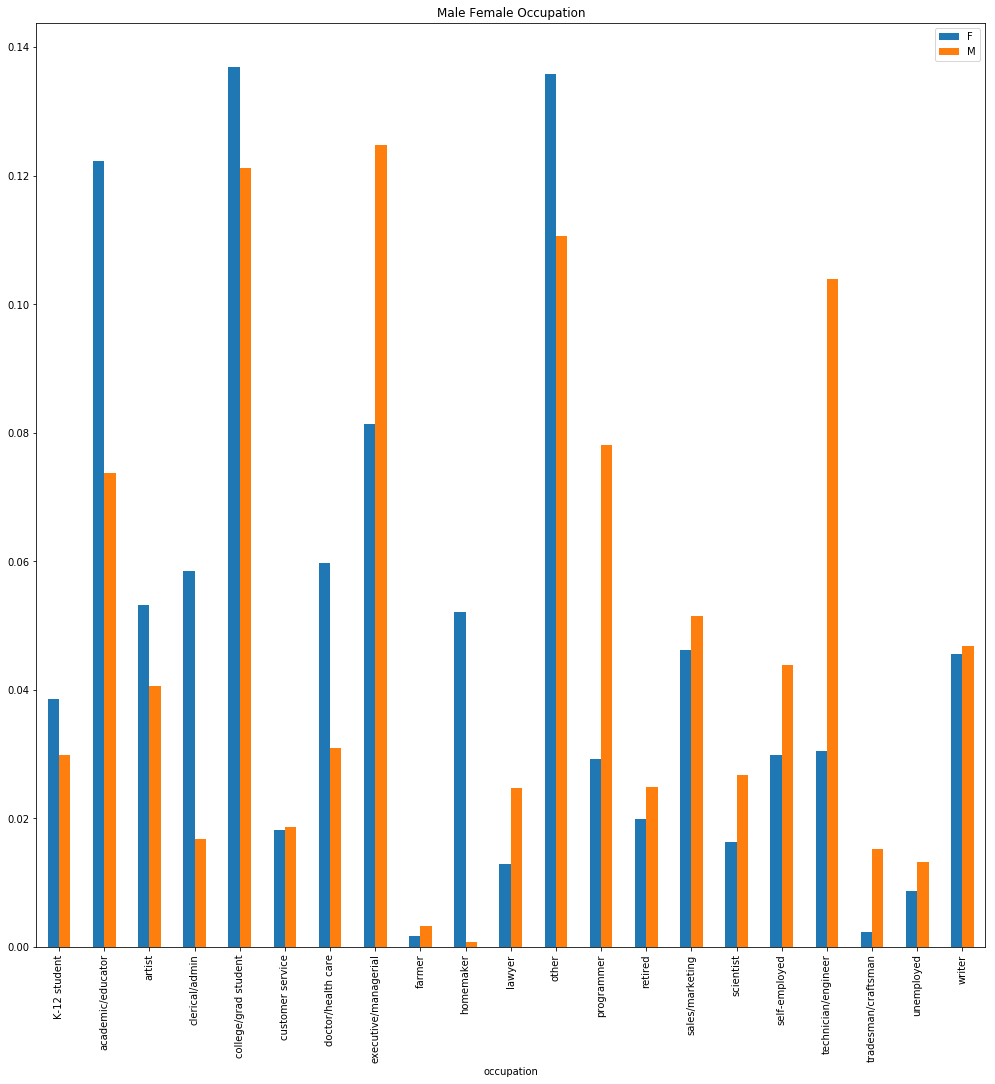

In [63]:
s = flattened.sum(axis=0).values
print(s)

flattened = flattened.apply(lambda x: x / s, axis=1)
print(flattened)

# plt.title("Male Female occupation")
flattened.plot.bar(figsize=(17,17), title="Male Female Occupation Proportion")

Users per state, keep just the 4 most populated for some statistics

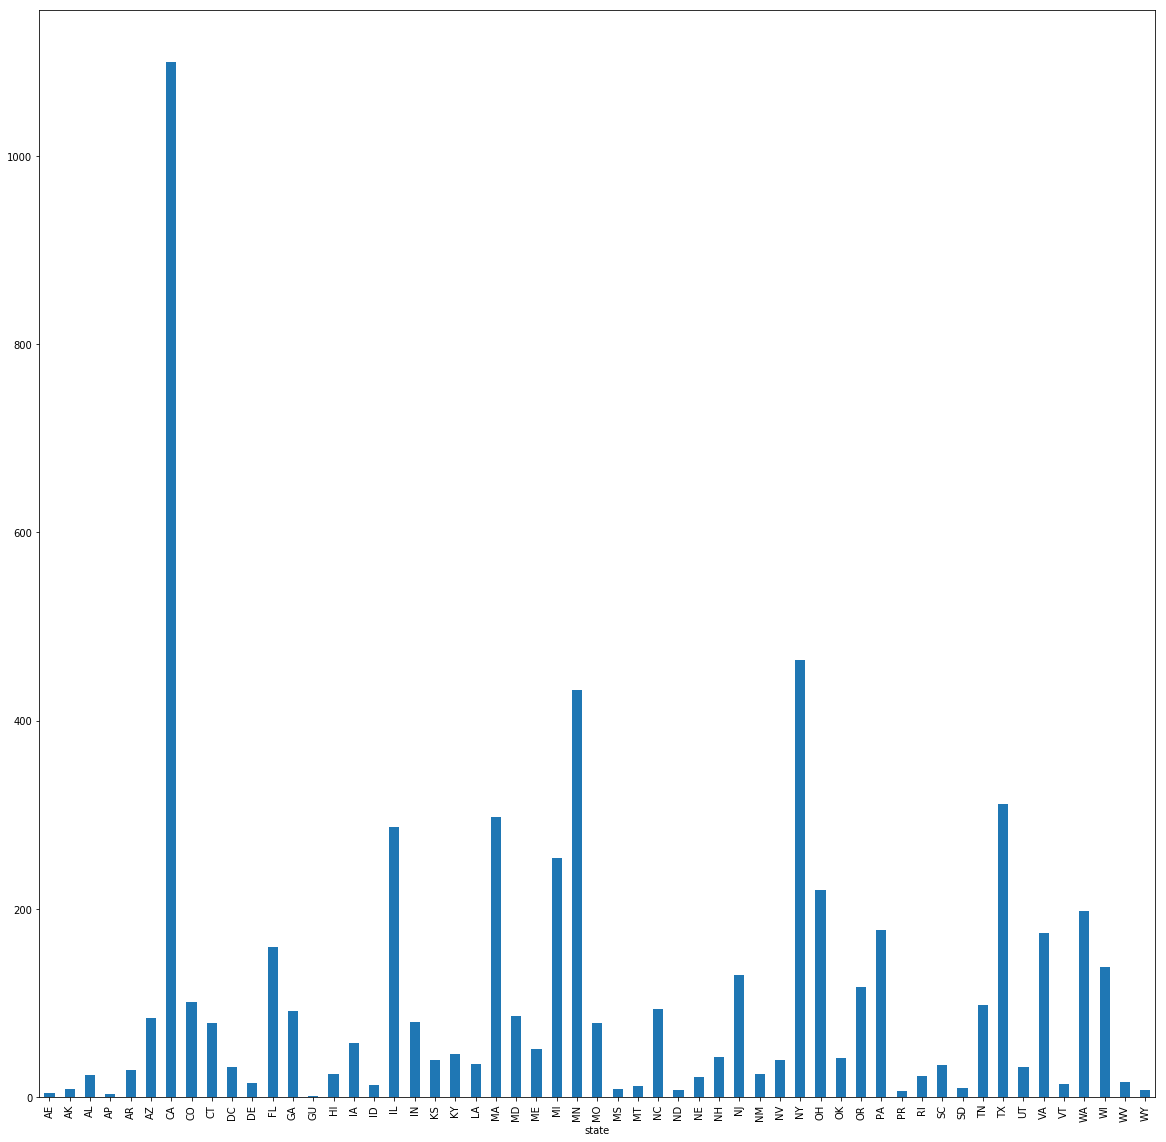

In [48]:
f_state = full.groupby("state").size()

plt.figure(figsize=(20,20))
f_state.plot(kind="bar")

# plt.savefig("states_hist")

In [49]:
state_mask = (full["state"].astype("str") == "CA") | (full["state"].astype("str") == "NY") \
    | (full["state"].astype("str") == "MN") | (full["state"].astype("str") == "TX")
# state_mask_ca = full["state"].astype("str") in ["CA", "NY"]

print(state_mask.shape)
print(sum(state_mask))
# type(full[state_mask]["state"])
# print(full[state_mask]["state"])

(5972,)
2307


In [50]:
full["occupation"].replace(occu, inplace=True)

cany = full[state_mask].groupby(["state", "occupation"]).size()

cany

state  occupation          
CA     K-12 student             24
       academic/educator        83
       artist                   66
       clerical/admin           27
       college/grad student    116
       customer service         16
       doctor/health care       38
       executive/managerial    120
       farmer                    4
       homemaker                 8
       lawyer                   14
       other                   130
       programmer               83
       retired                  31
       sales/marketing          57
       scientist                40
       self-employed            43
       technician/engineer     104
       tradesman/craftsman       4
       unemployed               15
       writer                   77
MN     K-12 student             17
       academic/educator        37
       artist                   27
       clerical/admin           18
       college/grad student     46
       customer service         11
       doctor/health care  

In [83]:
occ_state = pd.pivot_table(full[state_mask], index='occupation', columns='state', values='age', aggfunc='count')
occ_state.fillna(0, inplace=True)

In [84]:
n = occ_state.sum()
print(type(n))
print(n)
n = occ_state.sum().values
print(type(n))
print(n)

<class 'pandas.core.series.Series'>
state
CA    1100.0
MN     432.0
NY     464.0
TX     311.0
dtype: float64
<class 'numpy.ndarray'>
[1100.  432.  464.  311.]


In [85]:
occ_state = occ_state.apply(lambda x: np.asarray(x) / n, axis=1)
print(occ_state)
print(occ_state.sum(axis=0))

state                       CA        MN        NY        TX
occupation                                                  
K-12 student          0.021818  0.039352  0.030172  0.038585
academic/educator     0.075455  0.085648  0.084052  0.054662
artist                0.060000  0.062500  0.066810  0.035370
clerical/admin        0.024545  0.041667  0.017241  0.045016
college/grad student  0.105455  0.106481  0.107759  0.141479
customer service      0.014545  0.025463  0.019397  0.009646
doctor/health care    0.034545  0.020833  0.028017  0.061093
executive/managerial  0.109091  0.097222  0.161638  0.135048
farmer                0.003636  0.000000  0.004310  0.003215
homemaker             0.007273  0.011574  0.012931  0.012862
lawyer                0.012727  0.020833  0.028017  0.019293
other                 0.118182  0.101852  0.131466  0.073955
programmer            0.075455  0.108796  0.049569  0.054662
retired               0.028182  0.013889  0.021552  0.032154
sales/marketing       0.

In [86]:
flattened = pd.DataFrame(occ_state.to_records())
print(flattened)
flattened.set_index('occupation', inplace=True)
print(flattened)


              occupation        CA        MN        NY        TX
0           K-12 student  0.021818  0.039352  0.030172  0.038585
1      academic/educator  0.075455  0.085648  0.084052  0.054662
2                 artist  0.060000  0.062500  0.066810  0.035370
3         clerical/admin  0.024545  0.041667  0.017241  0.045016
4   college/grad student  0.105455  0.106481  0.107759  0.141479
5       customer service  0.014545  0.025463  0.019397  0.009646
6     doctor/health care  0.034545  0.020833  0.028017  0.061093
7   executive/managerial  0.109091  0.097222  0.161638  0.135048
8                 farmer  0.003636  0.000000  0.004310  0.003215
9              homemaker  0.007273  0.011574  0.012931  0.012862
10                lawyer  0.012727  0.020833  0.028017  0.019293
11                 other  0.118182  0.101852  0.131466  0.073955
12            programmer  0.075455  0.108796  0.049569  0.054662
13               retired  0.028182  0.013889  0.021552  0.032154
14       sales/marketing 

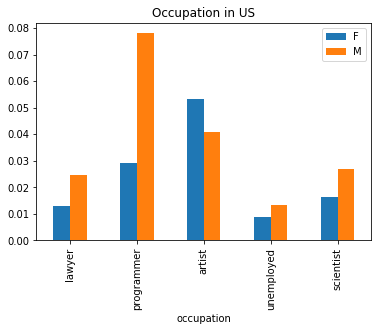

In [62]:
flattened.loc[['lawyer', 'programmer','artist', 'unemployed', 'scientist']].plot(kind='bar', title="Occupation in US")

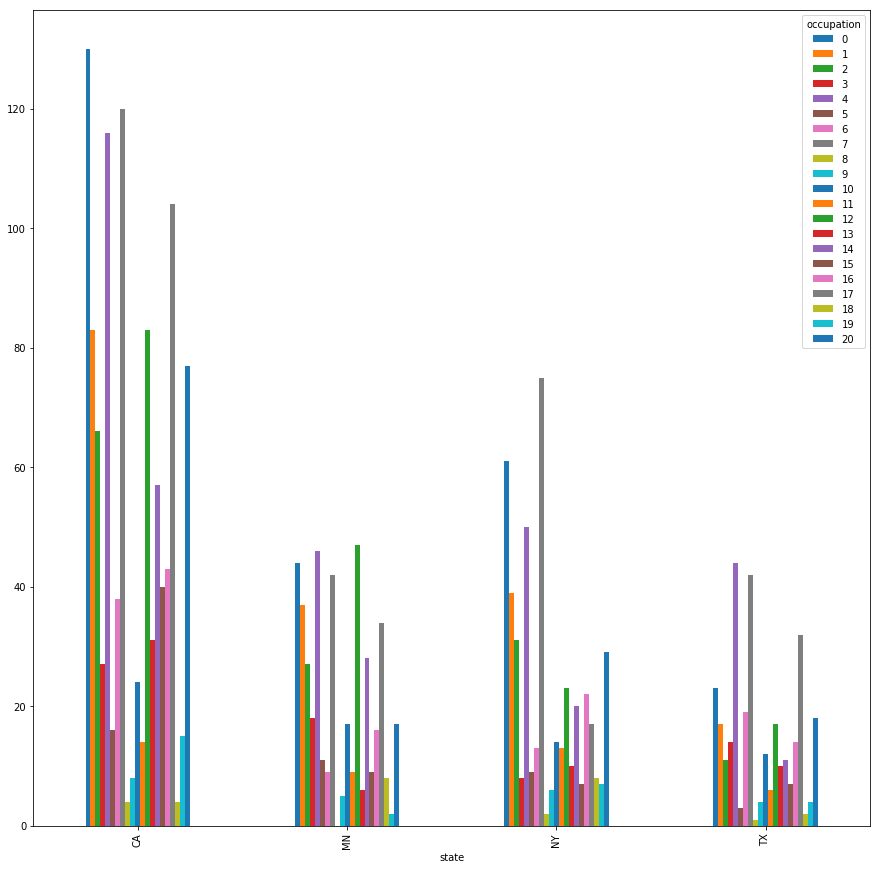

In [46]:
cany.unstack().plot(kind='bar',figsize=(15,15)) #.legend(loc='best', bbox_to_anchor=(1, 1.3))


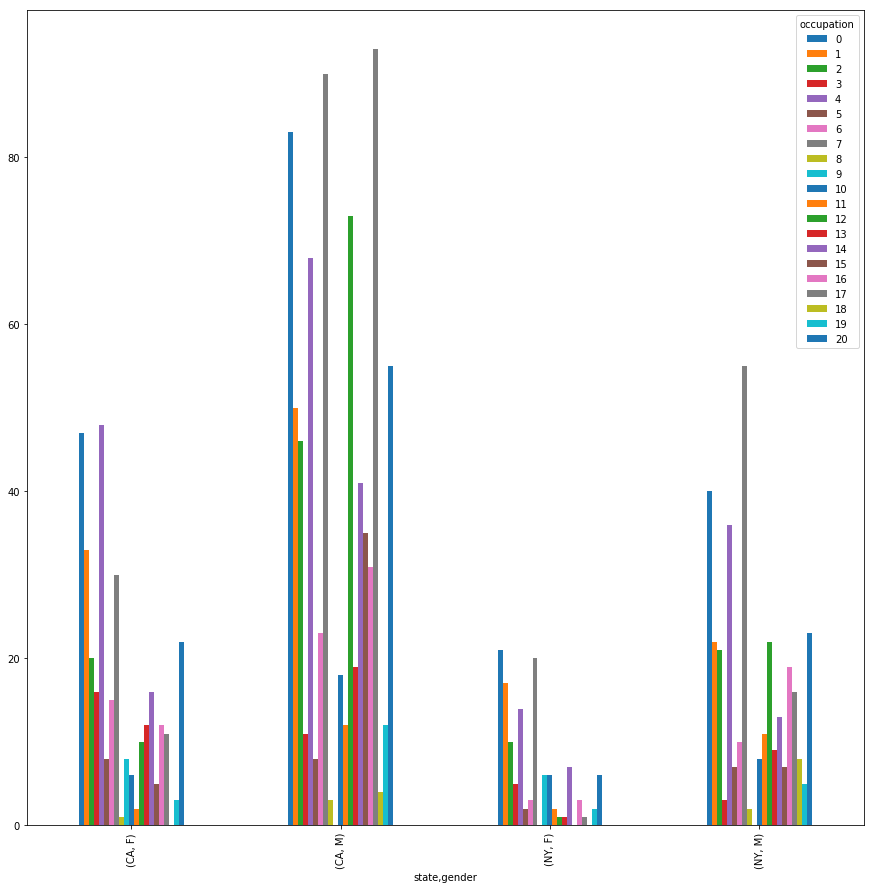

In [41]:
canymf = full[state_mask].groupby(["state", "gender", "occupation"]).size()

canymf.unstack().plot(kind='bar',figsize=(15,15))

In [ ]:
# save to csv
# users.to_csv(path_or_buf=)

In [ ]:
# see how many US there are

In [105]:
occ_mf_state = pd.pivot_table(full[state_mask], index=['occupation', 'state'], columns='gender', values='age', aggfunc='count')
occ_mf_state.fillna(0, inplace=True)
occ_mf_state

gender                         F     M
occupation           state            
K-12 student         CA      6.0  18.0
                     MN      7.0  10.0
                     NY      6.0   8.0
                     TX      4.0   8.0
academic/educator    CA     33.0  50.0
                     MN     14.0  23.0
                     NY     17.0  22.0
                     TX      9.0   8.0
artist               CA     20.0  46.0
                     MN      9.0  18.0
                     NY     10.0  21.0
                     TX      5.0   6.0
clerical/admin       CA     16.0  11.0
                     MN     10.0   8.0
                     NY      5.0   3.0
                     TX      5.0   9.0
college/grad student CA     48.0  68.0
                     MN     13.0  33.0
                     NY     14.0  36.0
                     TX     15.0  29.0
customer service     CA      8.0   8.0
                     MN      1.0  10.0
                     NY      2.0   7.0
                     TX      1.0   2.0
doctor/health care   CA     15.0  23.0
                     MN      5.0   4.0
                     NY      3.0  10.0
                     TX      8.0  11.0
executive/managerial CA     30.0  90.0
                     MN      6.0  36.0
...                          ...   ...
retired              NY      1.0   9.0
                     TX      1.0   9.0
sales/marketing      CA     16.0  41.0
                     MN      9.0  19.0
                     NY      7.0  13.0
                     TX      3.0   8.0
scientist            CA      5.0  35.0
                     MN      2.0   7.0
                     NY      0.0   7.0
                     TX      2.0   5.0
self-employed        CA     12.0  31.0
                     MN      2.0  14.0
                     NY      3.0  19.0
                     TX      3.0  11.0
technician/engineer  CA     11.0  93.0
                     MN      6.0  28.0
                     NY      1.0  16.0
                     TX      4.0  28.0
tradesman/craftsman  CA      0.0   4.0
                     MN      0.0   8.0
                     NY      0.0   8.0
                     TX      0.0   2.0
unemployed           CA      3.0  12.0
                     MN      0.0   2.0
                     NY      2.0   5.0
                     TX      1.0   3.0
writer               CA     22.0  55.0
                     MN      4.0  13.0
                     NY      6.0  23.0
                     TX      7.0  11.0

[83 rows x 2 columns]

In [106]:
#occ_mf_state.unstack().plot(kind='bar',figsize=(15,15))

              occupation state     F     M
0           K-12 student    CA   6.0  18.0
1           K-12 student    MN   7.0  10.0
2           K-12 student    NY   6.0   8.0
3           K-12 student    TX   4.0   8.0
4      academic/educator    CA  33.0  50.0
5      academic/educator    MN  14.0  23.0
6      academic/educator    NY  17.0  22.0
7      academic/educator    TX   9.0   8.0
8                 artist    CA  20.0  46.0
9                 artist    MN   9.0  18.0
10                artist    NY  10.0  21.0
11                artist    TX   5.0   6.0
12        clerical/admin    CA  16.0  11.0
13        clerical/admin    MN  10.0   8.0
14        clerical/admin    NY   5.0   3.0
15        clerical/admin    TX   5.0   9.0
16  college/grad student    CA  48.0  68.0
17  college/grad student    MN  13.0  33.0
18  college/grad student    NY  14.0  36.0
19  college/grad student    TX  15.0  29.0
20      customer service    CA   8.0   8.0
21      customer service    MN   1.0  10.0
22      cus

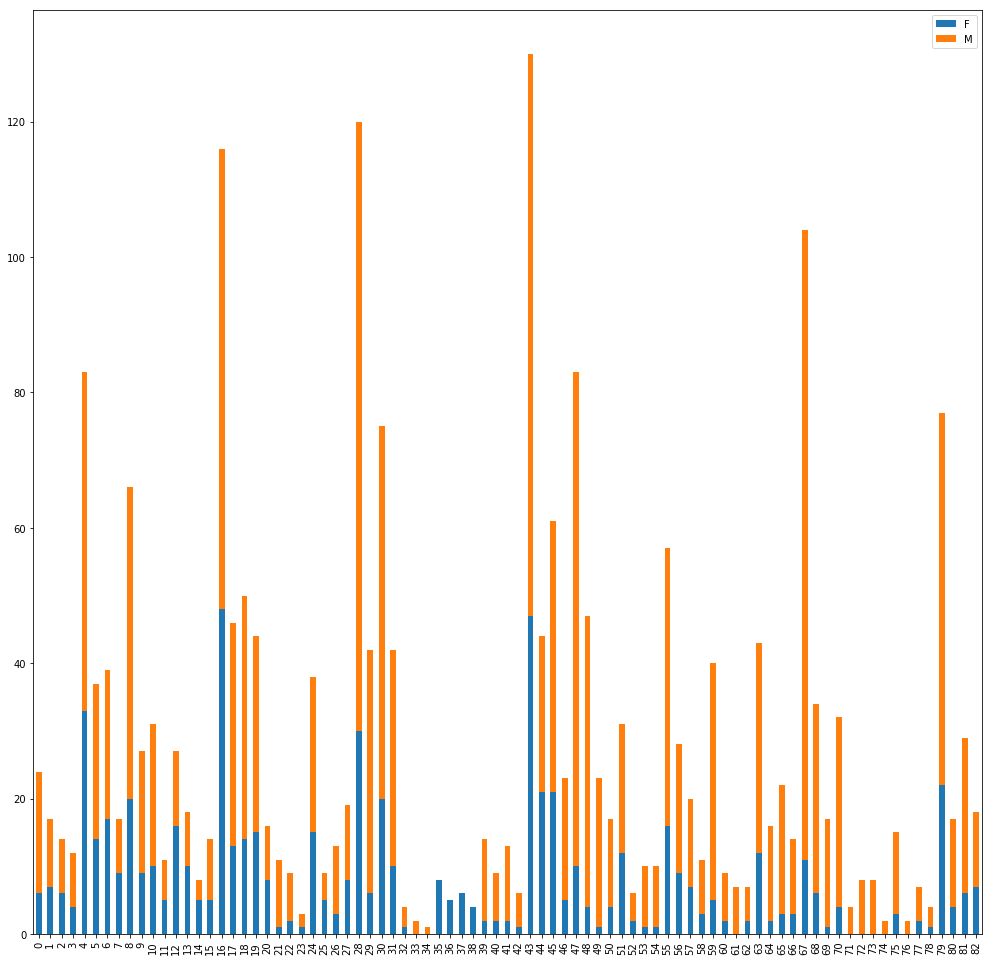

In [107]:
flattened = pd.DataFrame(occ_mf_state.to_records())
print(flattened)

flattened.plot.bar(stacked=True, figsize=(17,17))

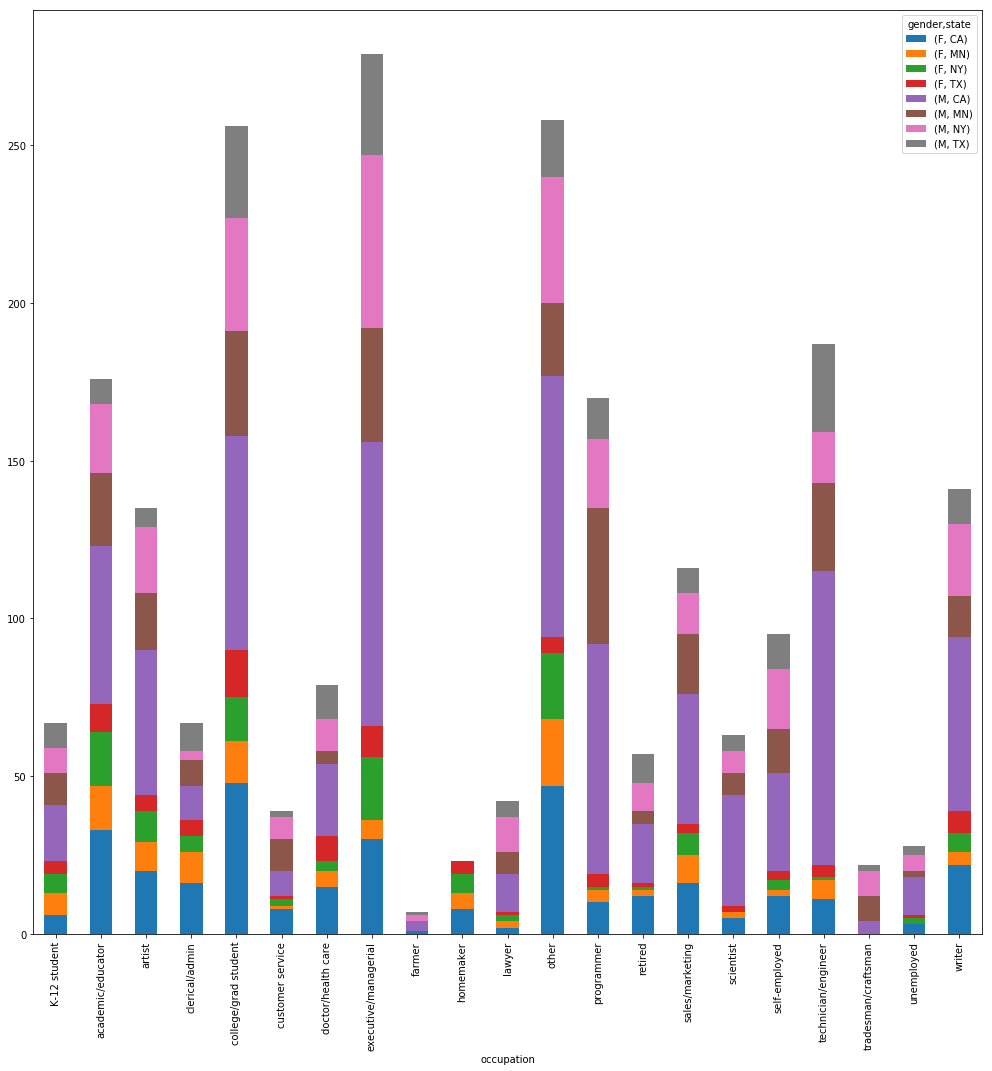

In [110]:
occ_mf_state.unstack().plot.bar(stacked=True, figsize=(17,17))

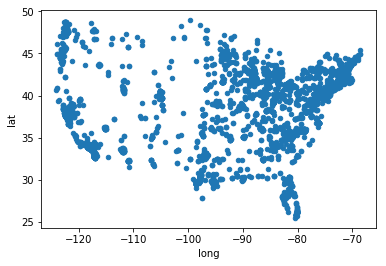

In [122]:
full[ (full['long'] < 0) & (full['long'] > -128) & (full['lat'] > 20)].plot(kind='scatter', x="long", y="lat")


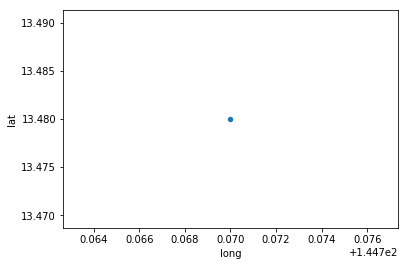

In [123]:
full[ full['long'] > 0].plot(kind='scatter', x="long", y="lat")

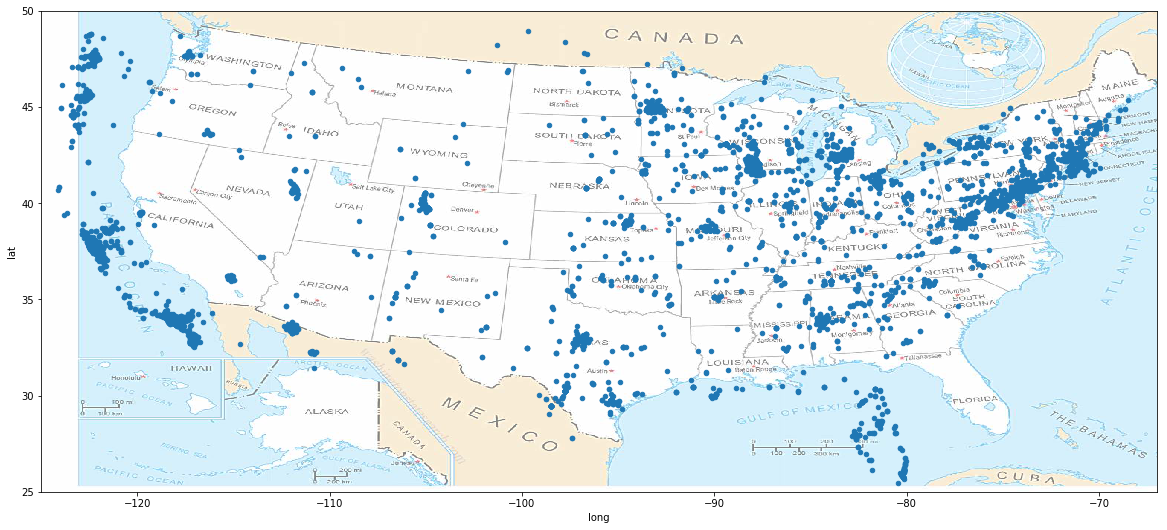

In [69]:
USA_img = mpimg.imread('USA3.htm')

ax = full[ (full['long'] < 0) & (full['long'] > -128) & (full['lat'] > 20)].plot(kind='scatter', x="long", y="lat", figsize=(20,20))

# ax = ca.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(20,20))

plt.imshow(USA_img, extent=[-125, -67, 25, 50], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.show()